# Random Forest - Binary Classification

# 0-Setup

This section contains all necessary library imports and initial configurations required for the analysis. We'll be using standard data science libraries including numpy, pandas, matplotlib, and seaborn for our analysis.

## Imports

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1-Data Loading and Exploration

In this section, we'll load and explore the Palmer Penguins dataset. This dataset contains physical measurements of three penguin species: Chinstrap, Adélie, and Gentoo. We'll examine the data structure, check for missing values, and understand the distribution of our target variable (species).

## The Data

We are going to use the 'Palmer Penguins' dataset because penguins are funny creatures. More info can be found at https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

<img src="images/penguin.jpg" style="max-width:400px">


Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

In [36]:
df = pd.read_csv("datasets/penguins_size.csv")

In [37]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


# 2-Data Processing

This section focuses on preparing our data for modeling. We'll perform the following steps:
1. Handle missing values
2. Convert categorical variables using one-hot encoding
3. Split the data into training and testing sets

In [38]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

## Train | Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 3-Model Building

In this section, we'll create and train our Random Forest model. We'll explore:
1. Basic Random Forest implementation
2. Hyperparameter tuning
3. Model optimization through grid search

## Random Forest classification

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [43]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [44]:
preds = model.predict(X_test)

# 4-Evaluation

This section focuses on evaluating our model's performance using various metrics:
1. Confusion Matrix
2. Classification Report
3. Feature Importance Analysis
4. Model Performance Analysis with different numbers of trees

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [46]:
cm = confusion_matrix(y_test,preds)

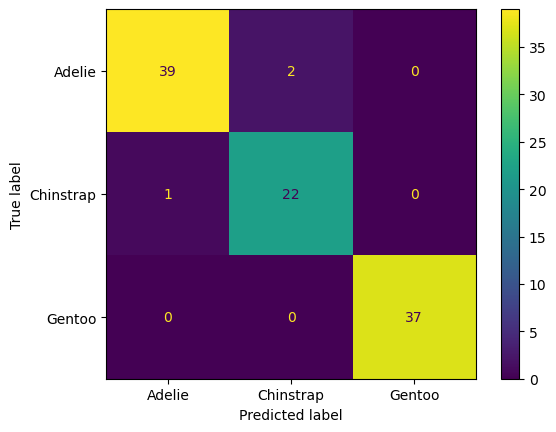

In [47]:

CM_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
CM_plot.plot()


In [48]:
print("Accuracy Score:", accuracy_score(y_test, preds))
print("\nClassification Report:")
print(classification_report(y_test, preds))

Accuracy Score: 0.9702970297029703

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



## Feature Importance

Very useful attribute of the trained model!

In [49]:
model.feature_importances_

array([0.31867744, 0.1018487 , 0.17343398, 0.21316964, 0.14512091,
       0.03720114, 0.00632264, 0.00422556])

## Choosing correct number of trees

Let's explore if continually adding more trees improves performance...

In [50]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))
 

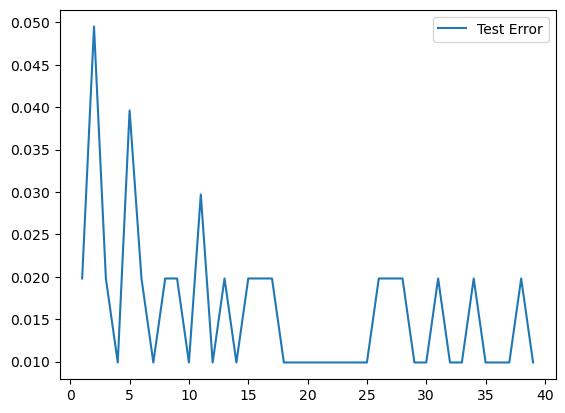

In [51]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

# Model Performance Analysis

Our Random Forest model for penguin classification shows several interesting characteristics:

1. **Classification Performance**:
   - The confusion matrix above visualizes the model's predictions vs actual species
   - Diagonal elements show correct predictions
   - Off-diagonal elements indicate misclassifications between species
   - With 10 trees, we can see how well the ensemble performs compared to a single decision tree

2. **Feature Importance**:
   - The feature importance plot shows which measurements are most crucial for species identification
   - This provides valuable insights for researchers about which physical characteristics are most distinctive between species
   - Helps prioritize which measurements to take in the field

3. **Number of Trees Analysis**:
   - The error plot shows how model performance changes with different numbers of trees
   - We can observe if adding more trees reduces error or if we reach diminishing returns
   - This helps us choose an optimal number of trees balancing accuracy and computational cost

4. **Advantages Over Single Decision Tree**:
   - Random Forest reduces overfitting through ensemble learning
   - More robust predictions by combining multiple trees
   - Better generalization to new penguin samples